In [1]:
import numpy as np               # used for multidimensional array
import pandas as pd              # used for import the dataset

import matplotlib.pyplot as plt  # used for Visualizing the result

#this will make your plot outputs appear and be stored within the notebook
%matplotlib inline

In [5]:
adult = pd.read_csv("adult_num.csv")

In [6]:
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [7]:
adult.keys()

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [8]:
#change order of columns so that 'hours-per-week' is the last column
adult1 = adult[['age', 'workclass', 'education', 'education-num', 'marital-status',\
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',\
                'native-country', 'income', 'hours-per-week']]

In [9]:
adult1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,hours-per-week
0,39,6,9,13,4,0,1,4,1,2174,0,38,0,40
1,50,5,9,13,2,3,0,4,1,0,0,38,0,13
2,38,3,11,9,0,5,1,4,1,0,0,38,0,40
3,53,3,1,7,2,5,0,2,1,0,0,38,0,40
4,28,3,9,13,2,9,5,2,0,0,0,4,0,40


In [10]:
X = adult1.iloc[:,:-1].values    # predictor attributes
y = adult1.iloc[:,-1].values     # target attribute

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
############################################################
###                Linear Regression                     ###
############################################################

from sklearn.linear_model import LinearRegression

# initialize the Naive Bayes classifier
LR = LinearRegression()

#fit the classifier to the data
LR.fit(X_train,y_train)

#use the resulting model to predict value on the test sey
y_pred = LR.predict(X_test)

#performance metrics
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 8.022730281550478
Mean Squared Error: 137.7998585141581
Root Mean Squared Error: 11.738818446255914 

R2 score: 0.1323292591264854
Adjusted R2 score: 0.1309413275857747


In [13]:
############################################################
###                  Regression Tree                     ###
############################################################

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

# Predict
y1_pred = regr_1.predict(X_test)
y2_pred = regr_2.predict(X_test)

In [17]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y2_pred)), '\n')

print("R2 score:", r2_score(y_test, y2_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y2_pred))*(len(y2_pred)-1)/(len(y2_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 7.677803586544974
Mean Squared Error: 125.05742946336503
Root Mean Squared Error: 11.182907916251704 

R2 score: 0.21256325192041747
Adjusted R2 score: 0.21130366317610405


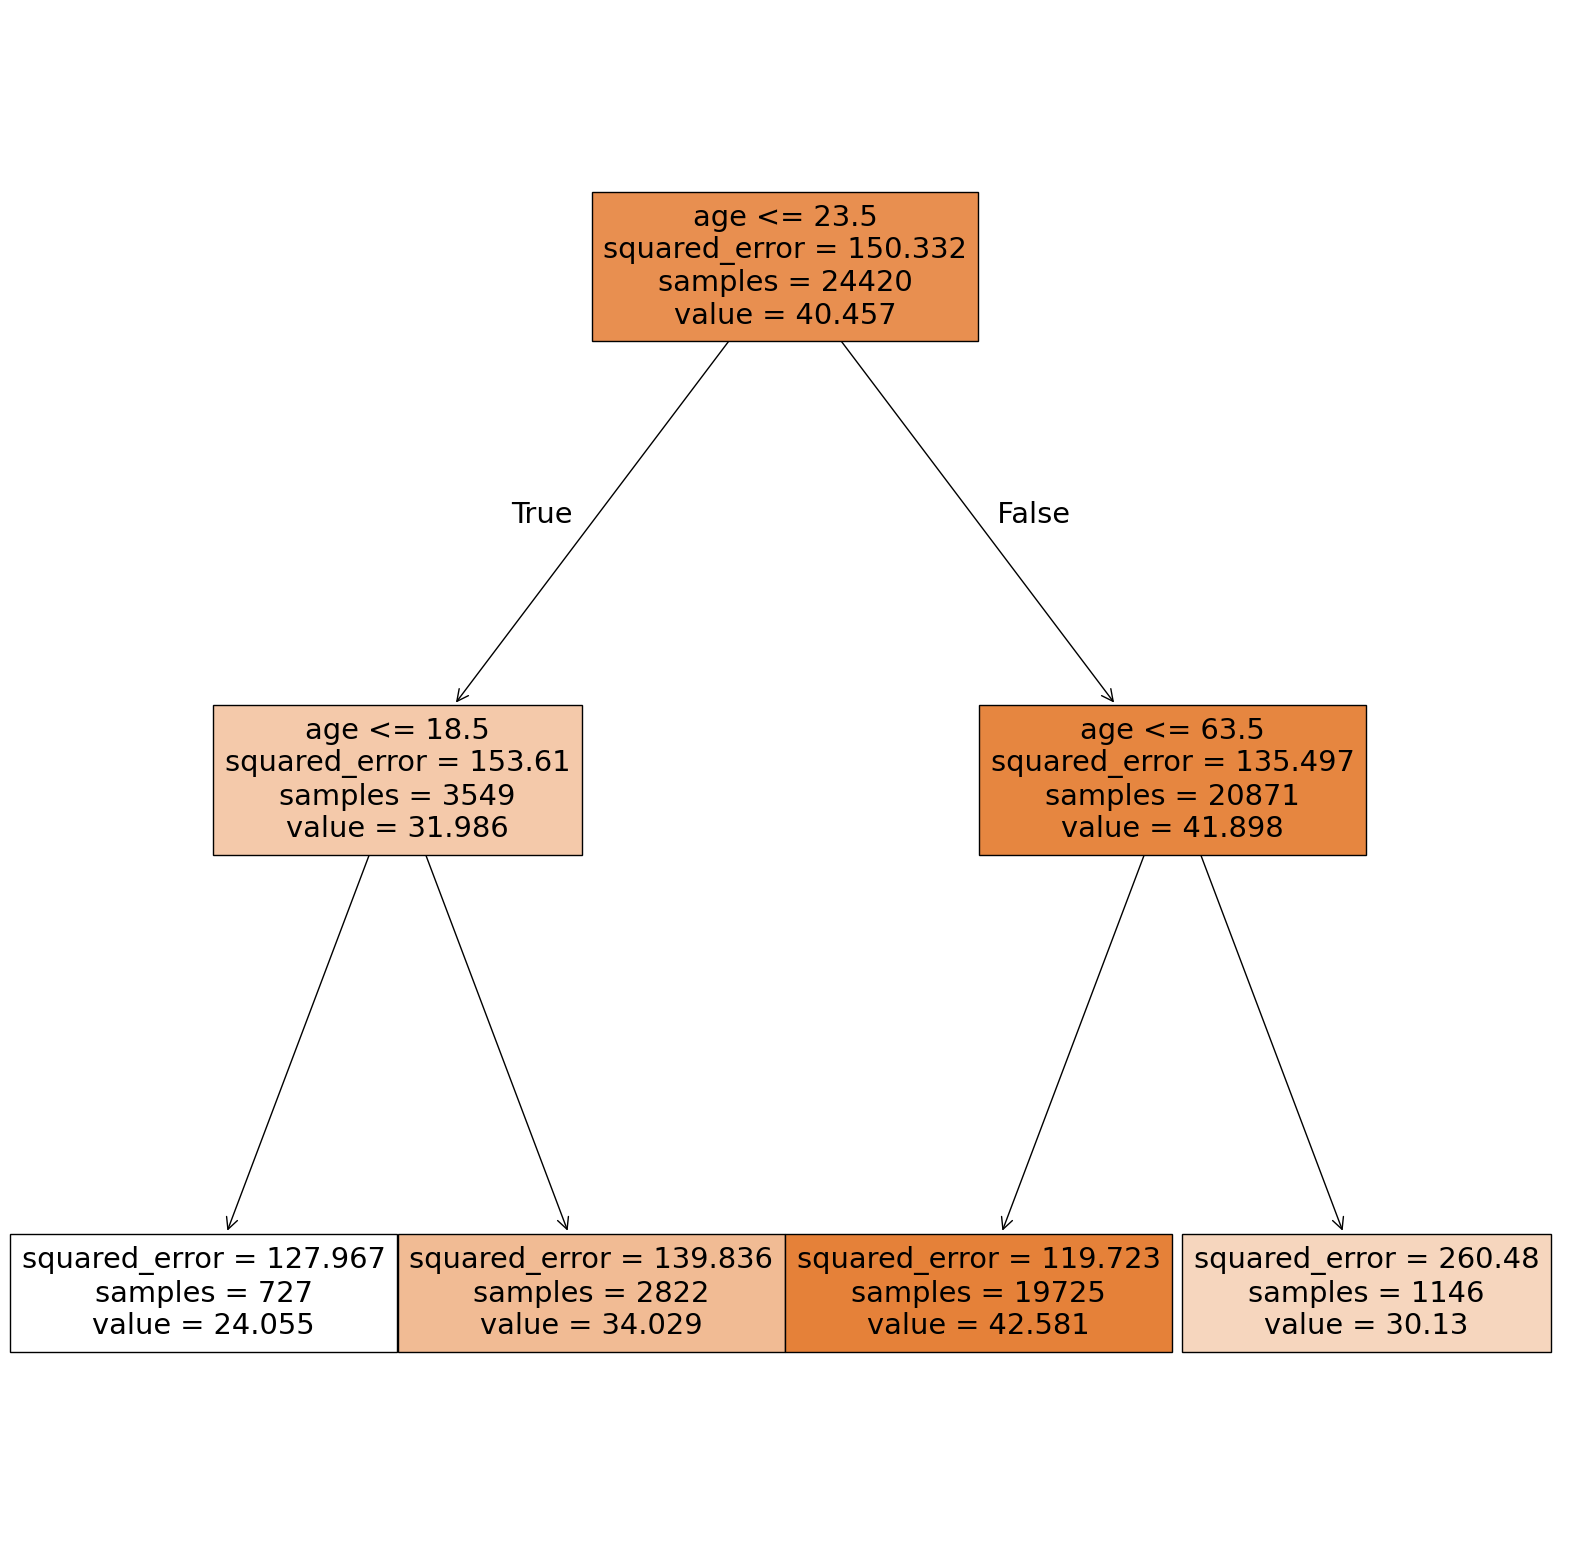

In [18]:
#visualise the tree
from sklearn import tree

plt.figure(figsize=(20,20))
features = adult.columns
classes = ['<=50k','>50k']
tree.plot_tree(regr_1,feature_names=features,class_names=classes,filled=True)
plt.show()

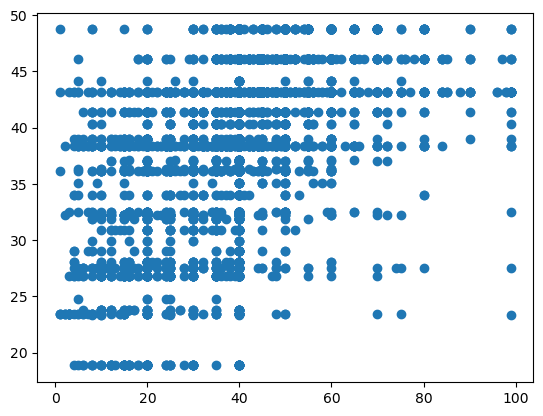

In [19]:
#scatter plot to visualise possible correlation
plt.scatter(y_test, y2_pred)
plt.show()